<a href="https://colab.research.google.com/github/jeyatharani/assign/blob/main/Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration : 0 => loss : 0.999988
iteration : 10 => loss : 0.819964
iteration : 20 => loss : 0.810076
iteration : 30 => loss : 0.804961
iteration : 40 => loss : 0.801609
iteration : 50 => loss : 0.799162
iteration : 60 => loss : 0.797246
iteration : 70 => loss : 0.795672
iteration : 80 => loss : 0.794336
iteration : 90 => loss : 0.793176
iteration : 100 => loss : 0.792155
iteration : 110 => loss : 0.791245
iteration : 120 => loss : 0.790427
iteration : 130 => loss : 0.789687
iteration : 140 => loss : 0.789013
iteration : 150 => loss : 0.788396
iteration : 160 => loss : 0.787829
iteration : 170 => loss : 0.787305
iteration : 180 => loss : 0.786820
iteration : 190 => loss : 0.786369
iteration : 200 => loss : 0.785949
iteration : 210 => loss : 0.785555
iteration : 220 => loss : 0.785186
iteration : 230 => loss : 0.784839
iteration : 240 => loss : 0.784512
iteration : 250 => loss : 0.784203
iteration : 260 => loss : 0.783911
iteration : 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

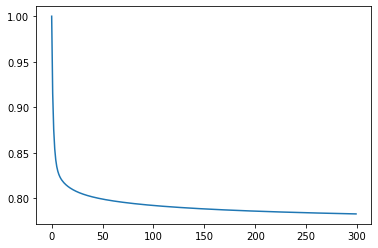

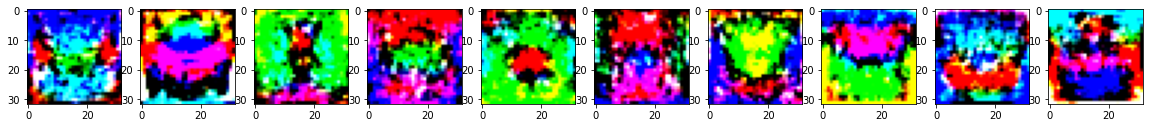

accuracy(test) =  0.40569999999999995 
accuracy(train) =  0.41944000000000004


In [19]:
#Q1
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  x=x_train[indices]
  y=y_train[indices]

  # Forward pass
  Ypr=x.dot(w1)+b1
  ls_h=1/batch_size*np.square(Ypr-y).sum()+reg*np.sum(w1*w1)
  loss_history.append(ls_h)

  # Backward pass
  dYpr=1./batch_size*2.0*(Ypr-y)
  d_b1=dYpr.sum()
  b1-=lr*d_b1
  d_w1=x.T.dot(dYpr)+reg*w1
  w1-=lr*d_w1
  lr*=lr_decay

  if t%10==0:
    print('iteration : %d => loss : %f'%(t,ls_h))

# Printing accuracies and displaying w as images

Ypr_trn=x_train.dot(w1)+b1
Ypr_tst=x_test.dot(w1)+b1

accuracy_trn=1.0-(np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(Ypr_trn,axis=1))))/Ntr
accuracy_tst=1.0-(np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(Ypr_tst,axis=1))))/Nte

plt.plot(loss_history)
fig,ax=plt.subplots(1,10)
fig.set_size_inches(20,10)

for i in range(10):
  img=w1[:,i].reshape(32,32,3)
  ax[i].imshow(img*1000)
plt.show()

print('accuracy(test) = ',accuracy_tst, '\naccuracy(train) = ',accuracy_trn)

x_train:  (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration: 0 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 10 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 20 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 30 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 40 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 50 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 60 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 70 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 80 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 90 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 100 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 110 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 120 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 130 => loss 0.735481   ,   accuracy(train) 0.466940
iteration: 140 => loss 0.735481   ,   accuracy(tr

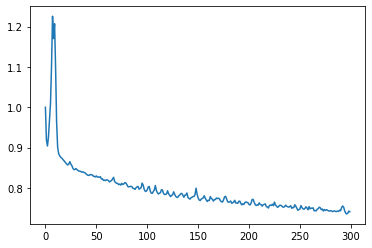

In [22]:
#Q2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200

std=1e-6
w1=std*np.random.randn(Din,H)
w2=std*np.random.randn(H,K)
b1=np.zeros(H)
b2=np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size=Ntr

iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []

for t in range(iterations):
  batch_indices = np.random.choice(Ntr,batch_size)

  x_tra=x_train[batch_indices]
  y_tra=y_train[batch_indices] 

  # Forward pass
  h=1.0/(1.0+np.exp(-(x_tra.dot(w1)+b1)))
  Ypr=h.dot(w2)+b2
  ls_h=1./batch_size*np.square(Ypr-y_tra).sum()+reg*(np.sum(w2*w2)+np.sum(w1*w1))
  loss_history.append(ls_h)

  # Backward pass
  dYpr=1./batch_size*2.0*(Ypr-y_tra)
  d_w2=h.T.dot(dYpr)+reg*w2
  d_b2=dYpr.sum(axis=0)
  dh=dYpr.dot(w2.T)
  d_w1=x_tra.T.dot(dh*h*(1-h))+reg*w1
  d_b1=(dh*h*(1-h)).sum(axis=0)

  tra_ac=1.0-(np.count_nonzero(np.abs(np.argmax(y_tra,axis=1)-np.argmax(Ypr,axis=1))))/Ntr
  train_acc_history.append(tra_ac)

  w1-=lr*d_w1
  w2-=lr*d_w2
  b1-=lr*d_b1
  b2-=lr*d_b2
  lr*=lr_decay 

  if t%10==0:
    print('iteration: %d => loss %f   ,   accuracy(train) %f' %(t,loss,acc))

# accuracies
h_trn=1.0/(1.0 + np.exp(-x_train.dot(w1)-b1))
h_tst=1.0/(1.0 + np.exp(-x_test.dot(w1)-b1))

Ypr_trn=h_trn.dot(w2) + b2
Ypr_tst=h_tst.dot(w2) + b2

accuracy_trn=(Ntr-np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(Ypr_trn,axis=1))))/Ntr
accuracy_tst=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(Ypr_tst,axis=1))))/Nte
print('accuracy(test) = ',accuracy_tst, '\naccuracy(train) = ',accuracy_trn)
plt.plot(loss_history)